Transformed Image Shape: torch.Size([3, 1504, 1504])


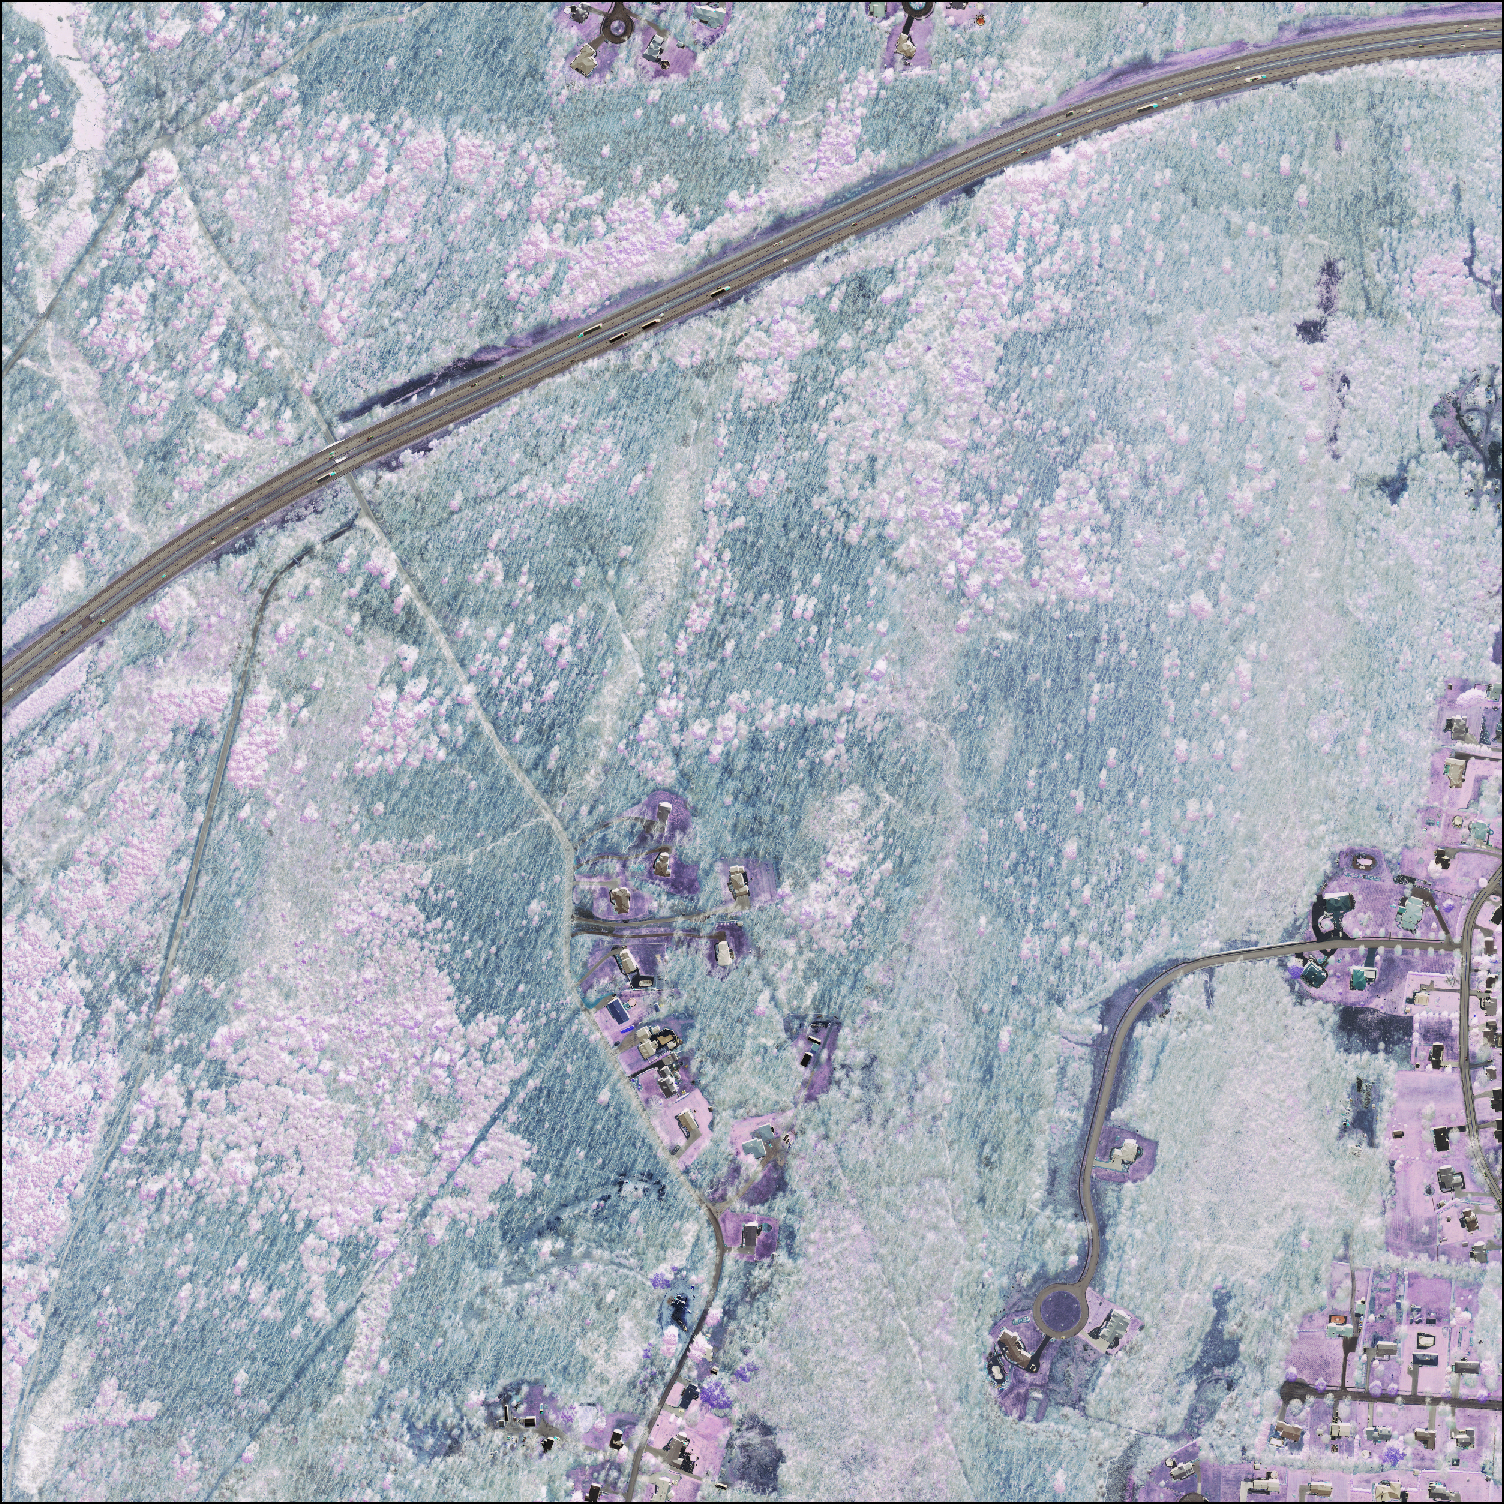

In [4]:
import matplotlib.pyplot as plt
from monai.transforms import *
from PIL import Image
import numpy as np
import torch
from monai.data import  PILReader

# transforms = Compose([
#     LoadImaged(keys=["img"], reader=PILReader, dtype=np.float32),
#     # EnsureChannelFirstd(keys=["label"], allow_missing_keys=True),  # if augmented label， release this code.
#     EnsureChannelFirstd(keys=["img"], channel_dim=-1, allow_missing_keys=True),  # 将通道移动到第一个维度
#     # ScaleIntensityd(keys=["img"], allow_missing_keys=True),   #将图像的像素值线性缩放到 [0, 1] 范围。
#     SpatialPadd(keys=["img"], spatial_size=1504),
#     # AsDiscreted(keys=['label'], to_onehot=3),
#     EnsureTyped(keys=["img"]),
#     # SqueezeDimd(keys=["label"], dim=0)
# ])

transforms = Compose([
    # LoadImage(image_only=True, reader=PILReader, dtype=np.float32),  # 直接加载单张图像
    # EnsureChannelFirst(),  # 将通道移动到第一个维度
    SpatialPad(spatial_size=1504),  # 填充到指定大小
    EnsureType(),  # 确保输出是 torch.Tensor
])

# 图片路径
image_path = "./image/10378780_15.tiff"  # 替换为你的图片路径

# 使用 PIL 加载图片
pil_image = Image.open(image_path)  # 加载图像

# 将 PIL 图像转换为 NumPy 数组
image_array = np.array(pil_image, dtype=np.float32)

# 将 NumPy 数组转换为 PyTorch Tensor
image_tensor = torch.tensor(image_array)

# 如果是灰度图像（单通道），添加一个通道维度
if len(image_tensor.shape) == 2:  # 如果形状是 [H, W]
    image_tensor = image_tensor.unsqueeze(0)  # 添加通道维度，变成 [C, H, W]

# 如果是彩色图像（RGB），将通道移动到第一个维度
elif len(image_tensor.shape) == 3 and image_tensor.shape[-1] == 3:  # 如果形状是 [H, W, C]
    image_tensor = image_tensor.permute(2, 0, 1)  # 变成 [C, H, W]

# 应用剩余的 MONAI 变换
transformed_image = transforms(image_tensor)



# 检查形状
print(f"Transformed Image Shape: {transformed_image.shape}")

transformed_image_np = transformed_image.numpy()

# 如果是单通道图片（如灰度图），移除通道维度
if transformed_image_np.shape[0] == 1:  # Shape is [C, H, W]
    transformed_image_np = transformed_image_np[0]  # 去掉第一个通道，变为 [H, W]
    # 转为 PIL 图像
    transformed_image_pil = Image.fromarray((transformed_image_np * 255).astype(np.uint8))  # 归一化到 [0, 255]
else:
    # 如果是彩色图像，将 [C, H, W] 转为 [H, W, C]
    transformed_image_np = np.transpose(transformed_image_np, (1, 2, 0))  # 转换通道顺序
    # 转为 PIL 图像
    transformed_image_pil = Image.fromarray((transformed_image_np * 255).astype(np.uint8))

# 使用 PIL 展示
transformed_image_pil.show()

